In [49]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from scipy.signal import stft
%matplotlib widget

In [34]:
path = 'output' # data folder
data_files = sorted(glob.glob(os.path.join(path, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))

In [35]:
data = np.concatenate([np.load(d)['data'] for d in data_files], axis=0).view('int8')
data.shape

(284672, 2)

(1000.0, 3000.0)

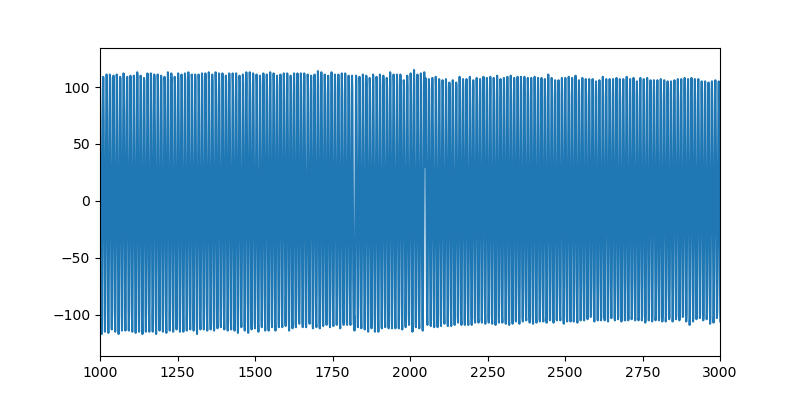

In [36]:
plt.figure(figsize=(8,4))
plt.plot(data[:,0])
plt.xlim(1000, 3000)